# Events 

In [100]:
import pandas
events = pandas.read_json("../data/events.json")
events

,event,year,keywords
0,9/11 September attack,2001,"[attack, terror, weapons, mass destruction]"
1,Iraq War,2003,"[iraq, war, collateral, patriot, surgical, dea..."
2,Facebook,2004,"[facebook, profile, like, friend]"
3,Indian Ocean earthquake and tsunami,2004,"[tsunami, earthquake, cataclysm, deaths]"
4,Twitter,2006,"[twitter, tweet, retweet]"
5,Apple launches iPhone,2007,"[apple, iphone, selfie]"
6,Great Recession,2008,"[crisis, debt, economic, financial, money, ban..."
7,Arab Spring,2010,"[revolution, arab, egypt, tunisia, libya, prot..."
8,Ebola,2013,"[ebola, virus, malaria]"
9,Crimea is annexed by Russia,2014,"[crimea, russia, ukraine, autonomous]"


In [101]:
gtrends = pandas.read_csv("../data/trends.csv")

In [102]:
gtrends.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [103]:
gtrends['query'].value_counts()

Paul Walker                                          84
Donald Trump                                         83
Facebook                                             62
Robin Williams                                       61
Whitney Houston                                      56
                                                     ..
What should a bride wear to the rehearsal dinner?     1
Kärlek och Anarki                                     1
和歌山トライアンズ                                             1
Úriemberek                                            1
Franco Armani                                         1
Name: query, Length: 18431, dtype: int64

In [104]:
gtrends['location'].unique()

array(['Global', 'France', 'Germany', 'United Kingdom', 'Australia',
       'Canada', 'Italy', 'Netherlands', 'Spain', 'United States',
       'Argentina', 'Austria', 'Belgium', 'Brazil', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Finland', 'Hong Kong', 'India',
       'Malaysia', 'Mexico', 'New Zealand', 'Philippines', 'Poland',
       'Russia', 'Singapore', 'South Africa', 'South Korea', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Honduras', 'Japan', 'Kenya',
       'Nigeria', 'Panama', 'Peru', 'Egypt', 'Hungary', 'Ireland',
       'Israel', 'Norway', 'Portugal', 'Romania', 'Saudi Arabia',
       'Serbia', 'Slovakia', 'Turkey', 'Ukraine', 'Ghana', 'Indonesia',
       'Senegal', 'Uganda', 'Vietnam', 'Bangladesh', 'Bulgaria',
       'Estonia', 'Latvia', 'Lithuania', 'Pakistan', 'Puerto Rico',
       'Slovenia', 'Uruguay', 'Venezuela', '

In [105]:
gtrends[(gtrends['rank']==5) & (gtrends['location']=="United States") & (gtrends['year']==2020)].iloc[:5]

,location,year,category,rank,query
26704,United States,2020,Searches,5,Coronavirus symptoms
26709,United States,2020,News,5,Iran
26714,United States,2020,People,5,Ryan Newman
26719,United States,2020,Actors,5,Ricky Gervais
26724,United States,2020,Athletes,5,Rudy Gobert


In [106]:
events.keywords[4]

['twitter', 'tweet', 'retweet']

In [107]:
import pytrends
from pytrends.request import TrendReq
kw_list0 = events.keywords[4]

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list0, cat=0, timeframe='all')

In [108]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

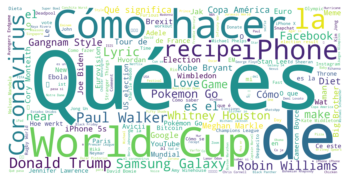

<Figure size 2880x1800 with 0 Axes>

In [109]:
wc = WordCloud(width=2000, height=1000,background_color="white", repeat=False)
text = " ".join(w for w in gtrends['query'])
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(40,25))
plt.show()

In [110]:
gtrends.groupby('location', sort=True).size().sort_values(axis=0,ascending=False)

location
United States         2070
Global                1135
Japan                  765
Canada                 690
Brazil                 675
                      ... 
Dominican Republic       5
El Salvador              5
Honduras                 5
Kuwait                   5
Sudan                    5
Length: 83, dtype: int64

We have the most data about the United States so we will focus on it in our project. 

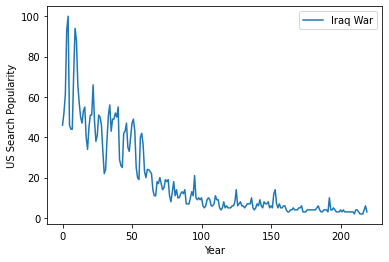

In [113]:
def plot_trends(event_df):
    plot = plt.figure().add_subplot()
    event_df.plot(ax=plot)
    plt.xlabel('Year')
    plt.ylabel('US Search Popularity')

    return plot

p1 = plot_trends(event0)
p1=plt.legend()
p1.get_texts()[0].set_text('Iraq War')


# Genres

 ## Scraping

In [114]:
# Source : https://github.com/kevinschaich/billboard

import musicbrainzngs as m
m.set_useragent("Wizards", "0.1", "fatih.mutlu@epfl.ch")

def get_tags(artist):
    try :
        artist_id = m.search_artists(artist)['artist-list'][0]['id']
    except IndexError:
        return None, False
    
    try : 
        tags = m.get_artist_by_id(artist_id, includes=["tags"])['artist']["tag-list"]
    except (UnboundLocalError, KeyError) :
        return None, False
    return [tag['name'] for tag in tags], True

In [ ]:
artist_genres = dict()
not_found_artists = []

for i in range(0,len(unique_artists)):
    genres, success = get_tags(unique_artists[i])
    
    if i == 10:
        print(i)
    if i%100 == 0: 
        print(i)
        
    if success:
        artist_genres[unique_artists[i]]=genres
        #print(unique_artists[i])
    else : 
        not_found_artists.append(unique_artists[i])
        #print(unique_artists[i])
    
# Took ~6 hours to finish 

## EDA

In [119]:
artist_genres_df = pandas.read_json("../data/artist_genres.json")

In [120]:
artist_genres_df.head()

,artist,genres
0,"""Groove"" Holmes","[hard bop, jazz and blues, soul jazz]"
1,"""Weird Al"" Yankovic","[accordion, american, comedy, comedy rock, par..."
2,'N Sync & Gloria Estefan,"[adult contemporary, american, bolero, conga, ..."
3,'N Sync Featuring Nelly,"[boy band, dance-pop, pop, pop and chart, pop ..."
4,'Til Tuesday,"[alternative rock, new wave]"


In [121]:
list(artist_genres_df.genres.values)[0]

['hard bop', 'jazz and blues', 'soul jazz']

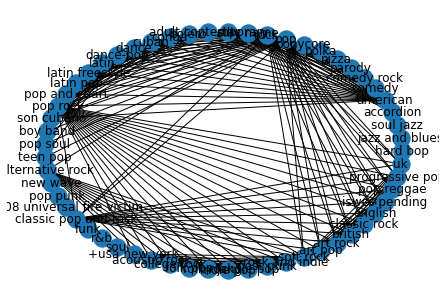

In [122]:
import itertools
import networkx as nx
G = nx.Graph()

genres_relations = list(artist_genres_df.genres.values)

for i in range(0, 10):
    G.add_nodes_from(genres_relations[i])
    G.add_edges_from(itertools.combinations(genres_relations[i],2))
    
nx.draw_circular(G,with_labels=True)

There are many subgenres in the dataset that aren't useful for the purpose of this graph. We will later aggregate them so that this graph becomes readable. 